In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import mglearn

/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


w[0]: 0.393906  b: -0.031804


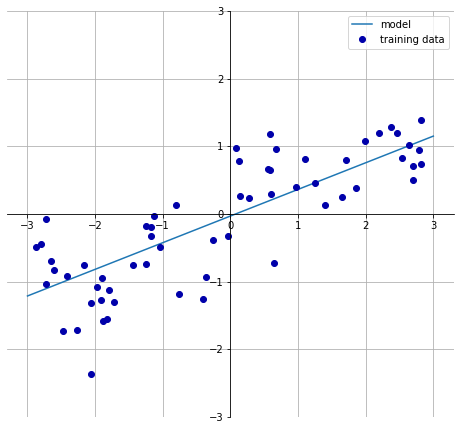

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))
# training set score and test set score 0.66 is very low but almost same -> underfitting

Training set score: 0.67
Test set score: 0.66


In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))
# result is sign of overfitting

Training set score: 0.95
Test set score: 0.61


In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train ,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train ,y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train ,y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


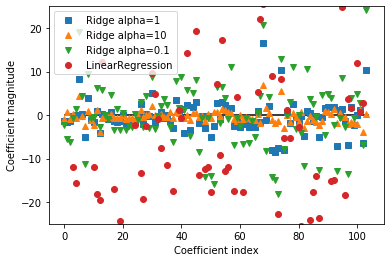

In [16]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

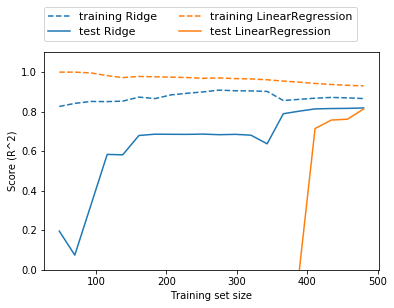

In [17]:
mglearn.plots.plot_ridge_n_samples()

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [22]:
# we increase the default setting of 'max_iter'
# otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


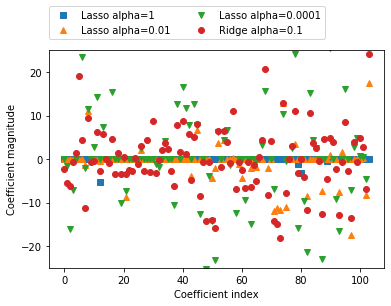

In [28]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso0001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

In [38]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=10000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(en.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(en.score(X_test, y_test)))

Training set score: 0.84
Test set score: 0.71
